#NAME: JAWAD HASSAN, NIMRA SIRAJ
#ROLL NO: 2230-0035, 2530-4028
##BS AI
###STATS PROJECT R LANG: DIABETES PREDICTION

In [3]:
#PREPROCESSING
data <- read.csv("/content/diabetes.csv")
head(data)
str(data)
colSums(data == 0)
zero_cols <- c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI")

data[zero_cols] <- lapply(data[zero_cols], function(x) ifelse(x == 0, NA, x))
colSums(is.na(data))
for (col in zero_cols) {
  data[[col]][is.na(data[[col]])] <- median(data[[col]], na.rm = TRUE)
}
colSums(data == 0)
colSums(is.na(data))
#"""“Zero values in medical attributes like glucose and insulin are physiologically impossible, so we treated them as missing values and replaced them using median imputation.”""

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


Pregnancies                  Glucose            BloodPressure 
                     111                        5                       35 
           SkinThickness                  Insulin                      BMI 
                     227                      374                       11 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                      500

Pregnancies                  Glucose            BloodPressure 
                       0                        5                       35 
           SkinThickness                  Insulin                      BMI 
                     227                      374                       11 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

Pregnancies                  Glucose            BloodPressure 
                     111                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                      500

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

In [4]:
#INSTALL
install.packages(c( "corrplot", "caret", "randomForest", "e1071"))
library(ggplot2)
library(corrplot)
library(caret)
library(randomForest)
library(e1071)


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘proxy’


corrplot 0.95 loaded

Loading required package: lattice

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘e1071’


The following object is masked from ‘package:ggplot2’:

    element




  Pregnancies        Glucose       BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   : 44.00   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.75   1st Qu.: 64.00   1st Qu.:25.00  
 Median : 3.000   Median :117.00   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.66   Mean   : 72.39   Mean   :29.11  
 3rd Qu.: 6.000   3rd Qu.:140.25   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.00   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   : 14.0   Min.   :18.20   Min.   :0.0780           Min.   :21.00  
 1st Qu.:121.5   1st Qu.:27.50   1st Qu.:0.2437           1st Qu.:24.00  
 Median :125.0   Median :32.30   Median :0.3725           Median :29.00  
 Mean   :140.7   Mean   :32.46   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Ou

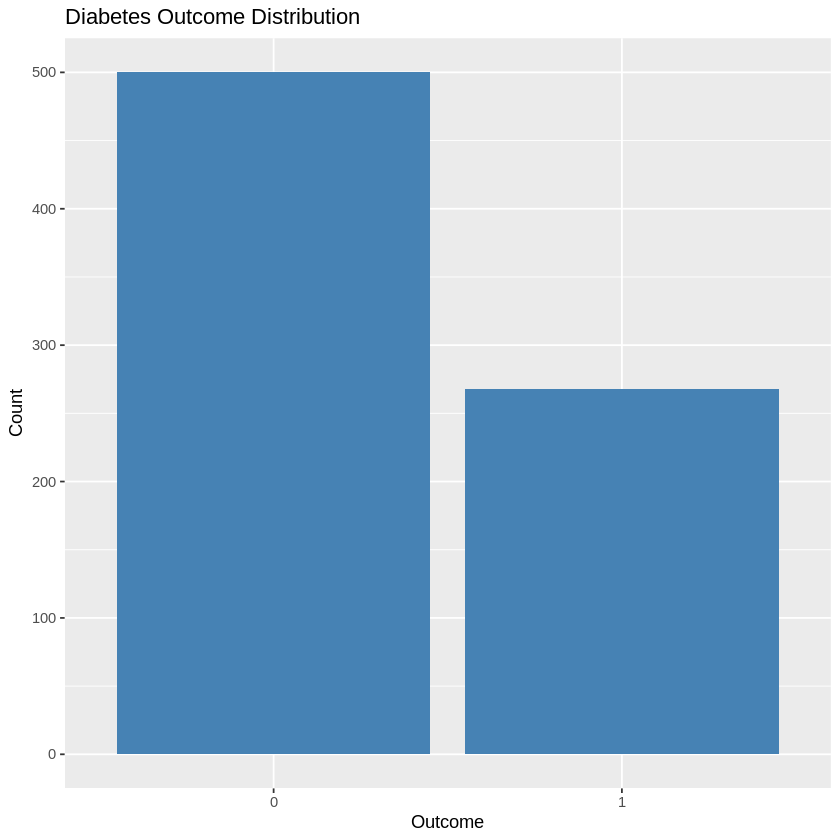

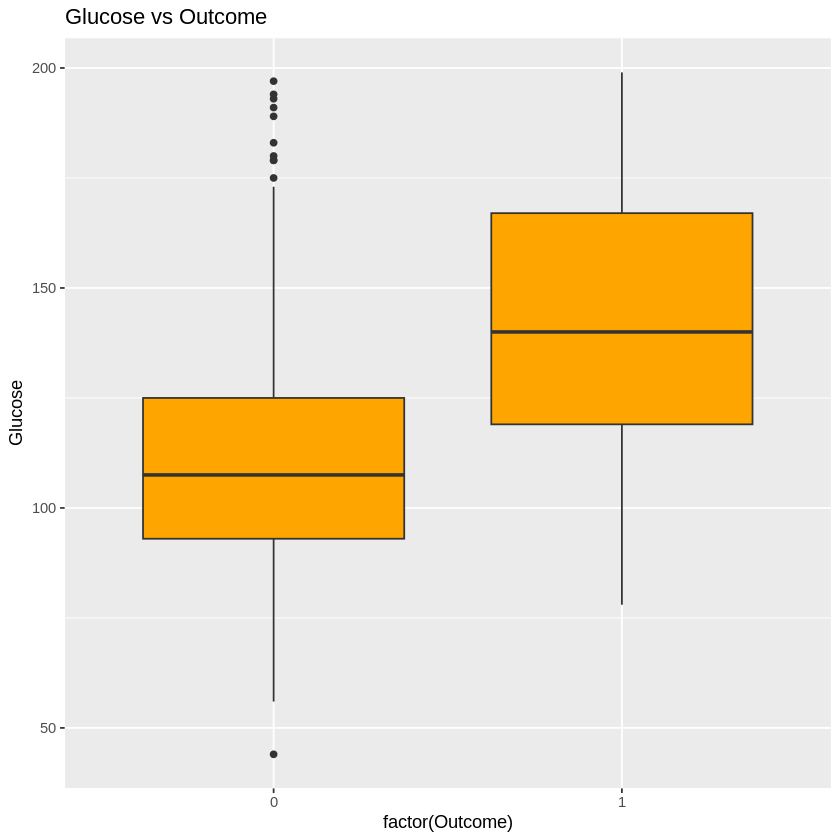

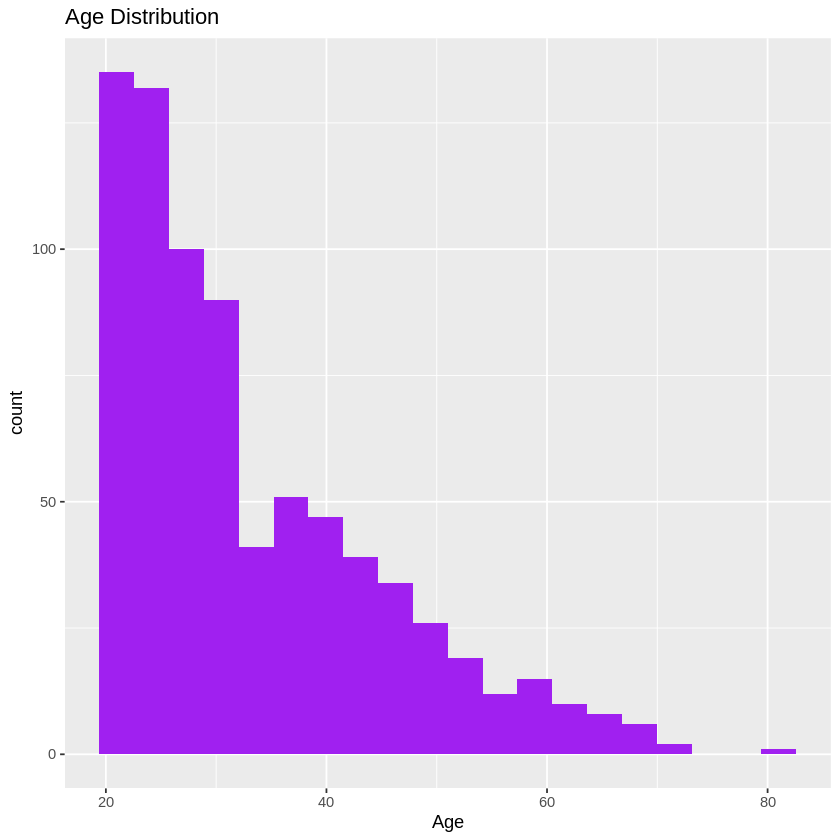

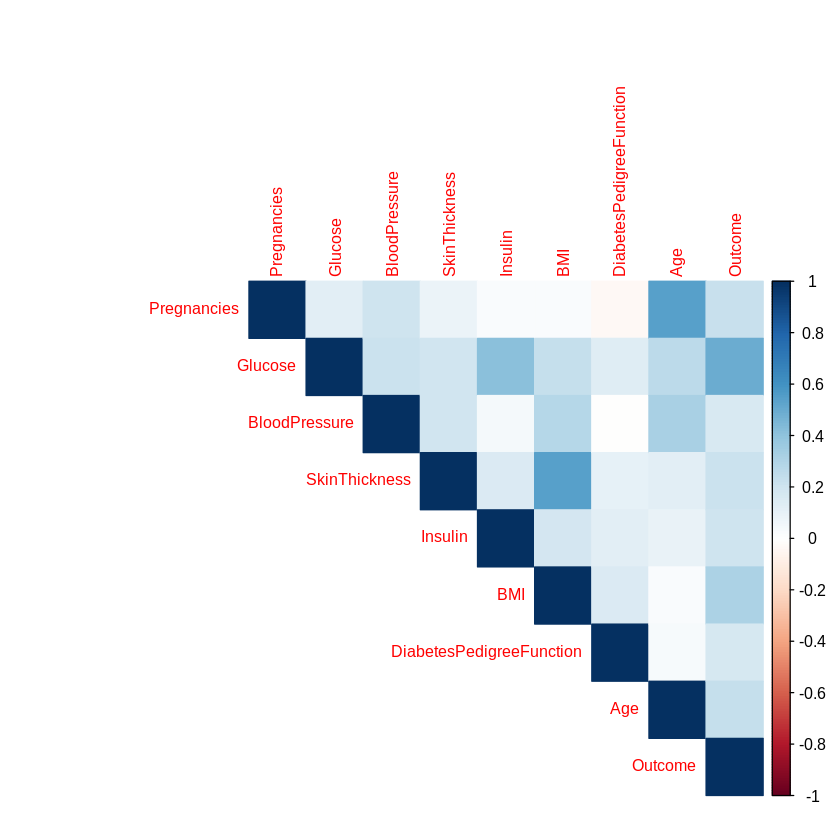

In [5]:
#EDA
summary(data)
ggplot(data, aes(x = factor(Outcome))) +
  geom_bar(fill = "steelblue") +
  labs(x = "Outcome", y = "Count", title = "Diabetes Outcome Distribution")
ggplot(data, aes(x = factor(Outcome), y = Glucose)) +
  geom_boxplot(fill = "orange") +
  labs(title = "Glucose vs Outcome")
ggplot(data, aes(x = Age)) +
  geom_histogram(bins = 20, fill = "purple") +
  labs(title = "Age Distribution")

cor_matrix <- cor(data)
corrplot(cor_matrix, method = "color", type = "upper", tl.cex = 0.8)


In [34]:
# ================================
# MODELLING
# ================================

set.seed(123)

# --------------------------------
# Train–Test Split
# --------------------------------
split <- createDataPartition(data$Outcome, p = 0.7, list = FALSE)
train <- data[split, ]
test  <- data[-split, ]

# --------------------------------
# Predictor columns
# --------------------------------
predictors <- c("Pregnancies", "Glucose", "BloodPressure",
                "SkinThickness", "Insulin", "BMI",
                "DiabetesPedigreeFunction", "Age")

# =====================================
# 1️⃣ LOGISTIC REGRESSION
# =====================================

# Outcome as numeric
train$Outcome_num <- as.numeric(as.character(train$Outcome))
test$Outcome_num  <- as.numeric(as.character(test$Outcome))

log_model <- glm(
  Outcome_num ~ .,
  data = train[, c(predictors, "Outcome_num")],
  family = binomial
)

log_prob <- predict(log_model,
                    newdata = test[, predictors],
                    type = "response")

log_pred <- ifelse(log_prob > 0.5, 1, 0)

# =====================================
# 2️⃣ KNN
# =====================================

# Outcome as factor
train$Outcome_fac <- as.factor(train$Outcome)
test$Outcome_fac  <- as.factor(test$Outcome)

# Scaling predictors ONLY
preproc <- preProcess(train[, predictors],
                      method = c("center", "scale"))

train_scaled <- predict(preproc, train[, predictors])
test_scaled  <- predict(preproc, test[, predictors])

knn_model <- knn3(
  x = train_scaled,
  y = train$Outcome_fac,
  k = 5
)

knn_pred <- predict(knn_model, test_scaled, type = "class")

# =====================================
# 3️⃣ SVM
# =====================================

# Combine scaled predictors with Outcome factor for training
svm_train <- cbind(train_scaled, Outcome_fac = train$Outcome_fac)

svm_model <- svm(
  Outcome_fac ~ .,
  data = svm_train,
  kernel = "radial",
  probability = TRUE
)

svm_pred <- predict(svm_model, newdata = test_scaled, probability = TRUE)

# --------------------------------
# SANITY CHECK
# --------------------------------
table(log_pred)
table(knn_pred)
table(svm_pred)


log_pred
  0   1 
171  59 

knn_pred
  0   1 
160  70 

svm_pred
  0   1 
160  70 

In [35]:
# =====================================
# MODEL EVALUATION FUNCTION
# =====================================

library(caret)

evaluate_model <- function(actual, predicted, model_name = "") {

  # Ensure factors for classification metrics
  actual_fac    <- as.factor(actual)
  predicted_fac <- as.factor(predicted)

  # Classification Metrics
  cm <- confusionMatrix(predicted_fac, actual_fac, positive = "1")

  # Extract precision, recall
  precision <- cm$byClass["Precision"]
  recall    <- cm$byClass["Recall"]

  # F1 manually
  f1_score <- ifelse((precision + recall) == 0, 0, 2 * (precision * recall) / (precision + recall))

  # Convert to numeric for regression-style metrics
  actual_num    <- as.numeric(as.character(actual))
  predicted_num <- as.numeric(as.character(predicted))

  mse  <- mean((actual_num - predicted_num)^2)
  rmse <- sqrt(mse)
  mae  <- mean(abs(actual_num - predicted_num))

  # MAPE safe handling (avoid division by zero)
  mape <- mean(ifelse(actual_num == 0, NA, abs((actual_num - predicted_num) / actual_num))) * 100

  nmae <- mae / (max(actual_num) - min(actual_num))
  r2   <- 1 - sum((actual_num - predicted_num)^2) / sum((actual_num - mean(actual_num))^2)

  results <- data.frame(
    Model      = model_name,
    Accuracy   = round(cm$overall["Accuracy"], 4),
    Precision  = round(precision, 4),
    Recall     = round(recall, 4),
    F1_Score   = round(f1_score, 4),
    MSE        = round(mse, 4),
    RMSE       = round(rmse, 4),
    MAE        = round(mae, 4),
    MAPE       = round(mape, 2),
    NMAE       = round(nmae, 4),
    R_Square   = round(r2, 4)
  )

  list(
    Confusion_Matrix = cm$table,
    Metrics = results
  )
}


In [36]:
log_eval <- evaluate_model(test$Outcome, log_pred, "Logistic Regression")
log_eval$Confusion_Matrix
log_eval$Metrics


          Reference
Prediction   0   1
         0 134  37
         1  15  44

,Model,Accuracy,Precision,Recall,F1_Score,MSE,RMSE,MAE,MAPE,NMAE,R_Square
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,Logistic Regression,0.7739,0.7458,0.5432,0.6286,0.2261,0.4755,0.2261,NA,0.2261,0.009


In [37]:
knn_eval <- evaluate_model(test$Outcome, knn_pred, "KNN")
knn_eval$Confusion_Matrix
knn_eval$Metrics


          Reference
Prediction   0   1
         0 130  30
         1  19  51

,Model,Accuracy,Precision,Recall,F1_Score,MSE,RMSE,MAE,MAPE,NMAE,R_Square
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,KNN,0.787,0.7286,0.6296,0.6755,0.213,0.4616,0.213,NA,0.213,0.0662


In [38]:
# Convert SVM predictions and actual outcomes to factors with levels 0 and 1
svm_eval <- evaluate_model(
  actual    = factor(test$Outcome, levels = c(0,1)),
  predicted = factor(svm_pred, levels = c(0,1)),
  model_name = "SVM"
)

# View confusion matrix
svm_eval$Confusion_Matrix

# View metrics
svm_eval$Metrics


          Reference
Prediction   0   1
         0 127  33
         1  22  48

,Model,Accuracy,Precision,Recall,F1_Score,MSE,RMSE,MAE,MAPE,NMAE,R_Square
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,SVM,0.7609,0.6857,0.5926,0.6358,0.2391,0.489,0.2391,NA,0.2391,-0.0481


In [39]:
final_comparison <- rbind(
  log_eval$Metrics,
  knn_eval$Metrics,
  svm_eval$Metrics
)

final_comparison


,Model,Accuracy,Precision,Recall,F1_Score,MSE,RMSE,MAE,MAPE,NMAE,R_Square
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,Logistic Regression,0.7739,0.7458,0.5432,0.6286,0.2261,0.4755,0.2261,NA,0.2261,0.0090
Accuracy1,KNN,0.7870,0.7286,0.6296,0.6755,0.2130,0.4616,0.2130,NA,0.2130,0.0662
Accuracy2,SVM,0.7609,0.6857,0.5926,0.6358,0.2391,0.4890,0.2391,NA,0.2391,-0.0481


In [40]:
final_comparison[order(-final_comparison$Accuracy), ]


,Model,Accuracy,Precision,Recall,F1_Score,MSE,RMSE,MAE,MAPE,NMAE,R_Square
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy1,KNN,0.7870,0.7286,0.6296,0.6755,0.2130,0.4616,0.2130,NA,0.2130,0.0662
Accuracy,Logistic Regression,0.7739,0.7458,0.5432,0.6286,0.2261,0.4755,0.2261,NA,0.2261,0.0090
Accuracy2,SVM,0.7609,0.6857,0.5926,0.6358,0.2391,0.4890,0.2391,NA,0.2391,-0.0481


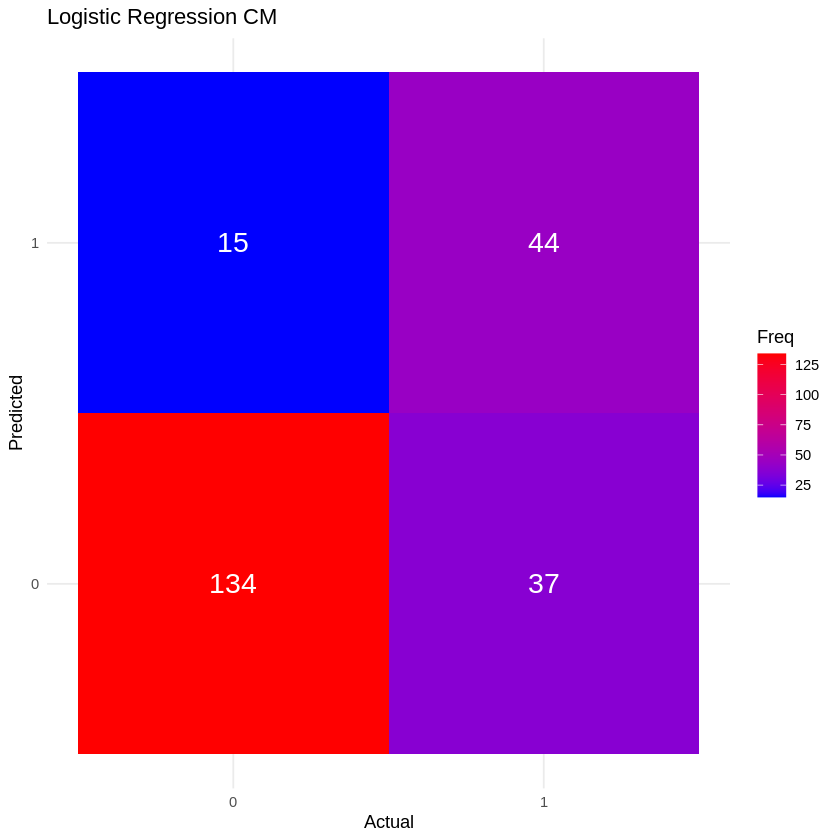

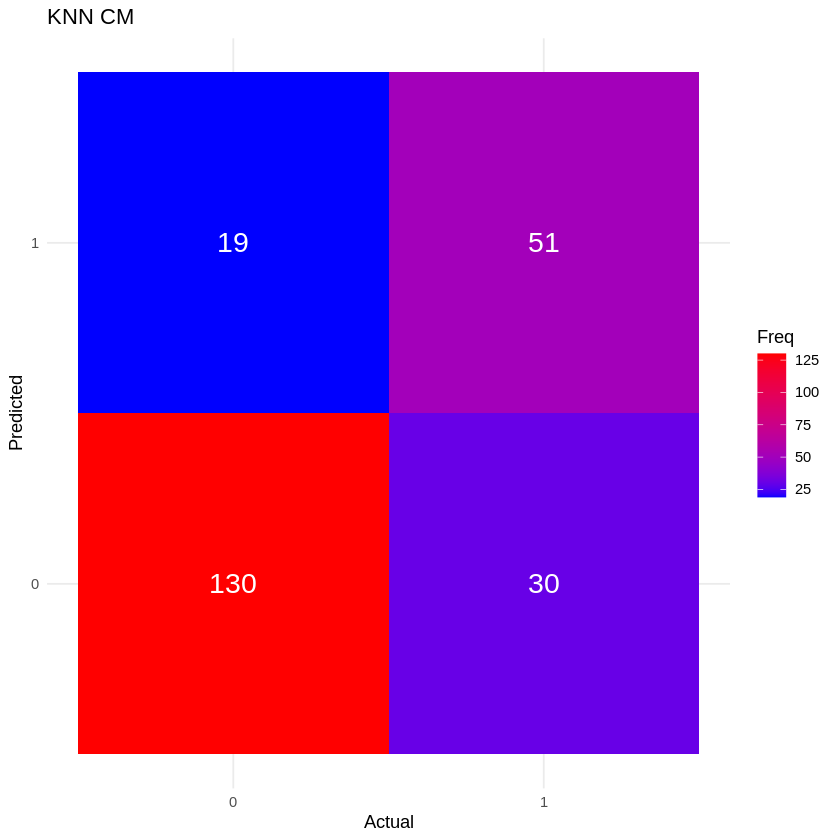

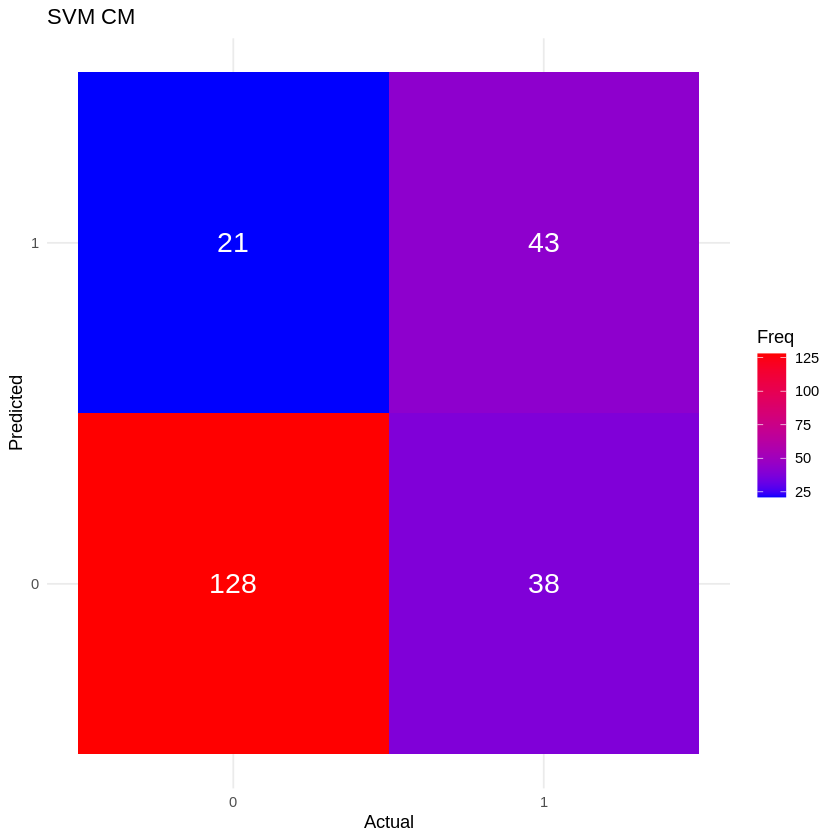

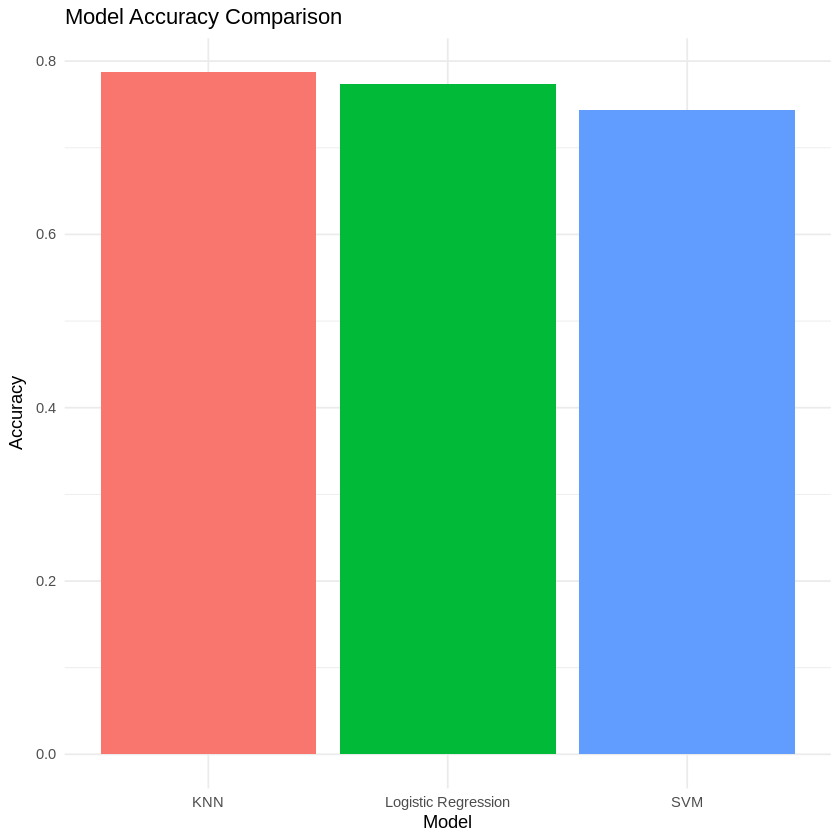

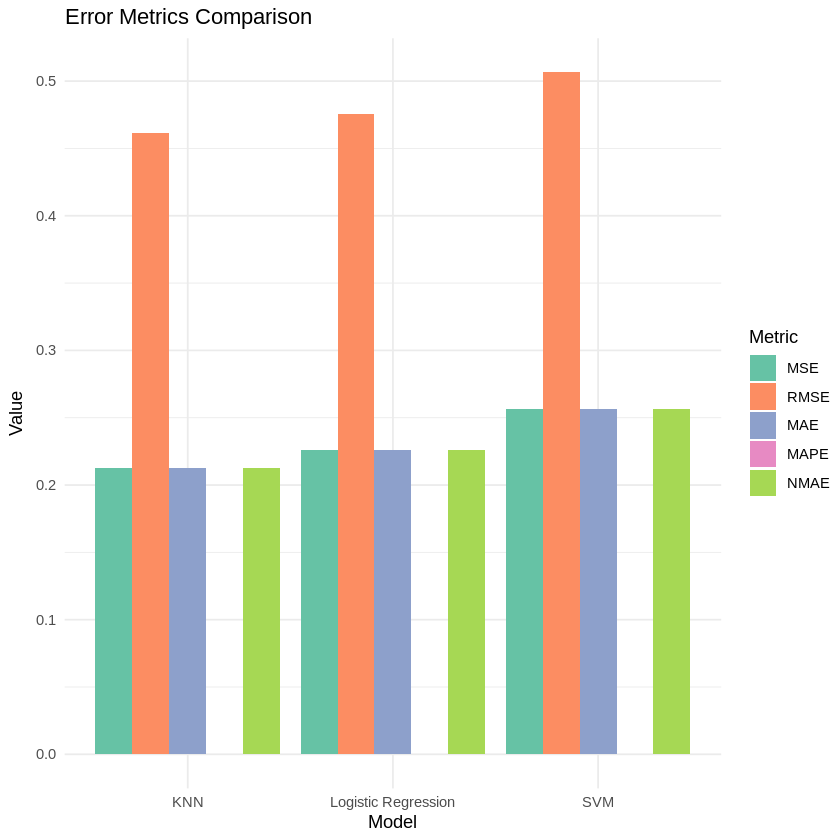

In [45]:
# ================================
# FULL MODEL TRAINING + COMPARISON VISUALS (WITHOUT RANDOM FOREST)
# ================================

library(caret)      # includes knn3
library(ggplot2)
library(e1071)
library(reshape2)    # for melt

set.seed(123)

# -------------------------
# Train-Test Split
# -------------------------
split <- createDataPartition(data$Outcome, p = 0.7, list = FALSE)
train <- data[split, ]
test  <- data[-split, ]

predictors <- c("Pregnancies", "Glucose", "BloodPressure",
                "SkinThickness", "Insulin", "BMI",
                "DiabetesPedigreeFunction", "Age")

# -------------------------
# Scale predictors for KNN & SVM
# -------------------------
preproc <- preProcess(train[, predictors], method = c("center", "scale"))
train_scaled <- predict(preproc, train[, predictors])
test_scaled  <- predict(preproc, test[, predictors])

train$Outcome_fac <- as.factor(train$Outcome)
test$Outcome_fac  <- as.factor(test$Outcome)
train$Outcome_num <- as.numeric(as.character(train$Outcome))
test$Outcome_num  <- as.numeric(as.character(test$Outcome))

# -------------------------
# 1️⃣ Logistic Regression
# -------------------------
log_model <- glm(
  Outcome_num ~ .,
  data = train[, c(predictors, "Outcome_num")],
  family = binomial
)
log_prob <- predict(log_model, newdata = test[, predictors], type = "response")
log_pred <- ifelse(log_prob > 0.5, 1, 0)

# -------------------------
# 2️⃣ KNN
# -------------------------
# Tune k
ks <- seq(3, 15, 2)
accs <- sapply(ks, function(k) {
  model <- knn3(x = train_scaled, y = train$Outcome_fac, k = k)
  pred  <- predict(model, test_scaled, type = "class")
  mean(pred == test$Outcome_fac)
})
best_k <- ks[which.max(accs)]

knn_model <- knn3(x = train_scaled, y = train$Outcome_fac, k = best_k)
knn_pred <- predict(knn_model, test_scaled, type = "class")

# -------------------------
# 3️⃣ SVM
# -------------------------
svm_train <- cbind(train_scaled, Outcome_fac = train$Outcome_fac)
tune_result <- tune.svm(
  Outcome_fac ~ .,
  data = svm_train,
  kernel = "radial",
  cost = 2^(0:4),
  gamma = c(0.01,0.05,0.1)
)
svm_model <- tune_result$best.model
svm_pred <- predict(svm_model, newdata = test_scaled)

# -------------------------
# Evaluate all models
# -------------------------
log_eval <- evaluate_model(factor(test$Outcome, levels=c(0,1)),
                           factor(log_pred, levels=c(0,1)), "Logistic Regression")
knn_eval <- evaluate_model(factor(test$Outcome, levels=c(0,1)),
                           factor(knn_pred, levels=c(0,1)), "KNN")
svm_eval <- evaluate_model(factor(test$Outcome, levels=c(0,1)),
                           factor(svm_pred, levels=c(0,1)), "SVM")

final_comparison <- rbind(log_eval$Metrics,
                          knn_eval$Metrics,
                          svm_eval$Metrics)

# -------------------------
# SAFE PLOTTING FOR ALL METRICS
# -------------------------

library(ggplot2)
library(reshape2)

# -------------------------
# Plot 1: Confusion Matrices
# -------------------------
plot_conf_matrix <- function(cm, title="Confusion Matrix") {
  cm_df <- as.data.frame(cm)
  colnames(cm_df) <- c("Predicted", "Actual", "Freq")
  cm_df$Predicted <- as.factor(cm_df$Predicted)
  cm_df$Actual    <- as.factor(cm_df$Actual)

  ggplot(cm_df, aes(x = Actual, y = Predicted, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), size = 6, color="white") +
    scale_fill_gradient(low = "blue", high = "red") +
    labs(title = title, x = "Actual", y = "Predicted") +
    theme_minimal()
}

plot_conf_matrix(log_eval$Confusion_Matrix, "Logistic Regression CM")
plot_conf_matrix(knn_eval$Confusion_Matrix, "KNN CM")
plot_conf_matrix(svm_eval$Confusion_Matrix, "SVM CM")

# -------------------------
# Plot 2: Accuracy Comparison
# -------------------------
ggplot(final_comparison, aes(x = Model, y = Accuracy, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "Model Accuracy Comparison", y = "Accuracy") +
  theme_minimal() +
  theme(legend.position = "none")

# -------------------------
# Plot 3: Error Metrics Comparison (MSE, RMSE, MAE, MAPE, NMAE)
# -------------------------
# Replace any NA in error metrics with 0 to avoid warnings
error_metrics <- final_comparison[, c("Model", "MSE","RMSE","MAE","MAPE","NMAE")]
error_metrics[is.na(error_metrics)] <- 0

error_melt <- melt(error_metrics, id.vars = "Model")

ggplot(error_melt, aes(x = Model, y = value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Error Metrics Comparison", y = "Value", fill = "Metric") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:randomForest’:

    combine




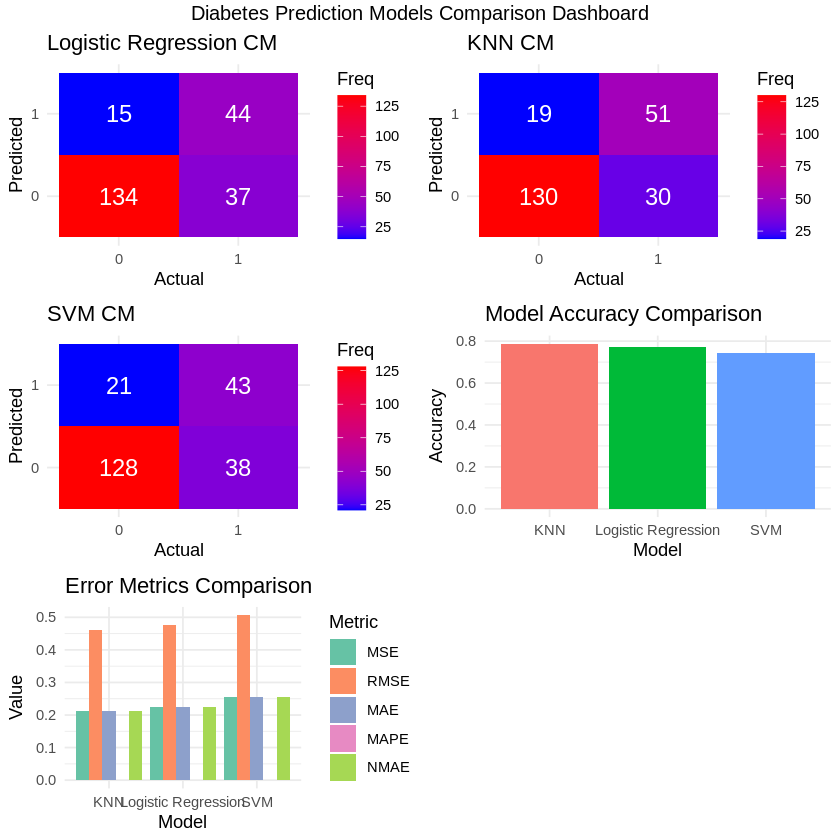

In [47]:
# ================================
# COMBINED DASHBOARD: Confusion Matrices + Accuracy + Error Metrics
# ================================
install.packages("gridExtra")

# Then load it
library(gridExtra)
library(ggplot2)
library(gridExtra)
library(reshape2)

# -------------------------
# Helper: Plot confusion matrix safely
# -------------------------
plot_conf_matrix <- function(cm, title="Confusion Matrix") {
  cm_df <- as.data.frame(cm)
  colnames(cm_df) <- c("Predicted", "Actual", "Freq")
  cm_df$Predicted <- as.factor(cm_df$Predicted)
  cm_df$Actual    <- as.factor(cm_df$Actual)

  ggplot(cm_df, aes(x = Actual, y = Predicted, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), size = 5, color="white") +
    scale_fill_gradient(low = "blue", high = "red") +
    labs(title = title, x = "Actual", y = "Predicted") +
    theme_minimal()
}

# -------------------------
# Confusion Matrices
# -------------------------
cm_log <- plot_conf_matrix(log_eval$Confusion_Matrix, "Logistic Regression CM")
cm_knn <- plot_conf_matrix(knn_eval$Confusion_Matrix, "KNN CM")
cm_svm <- plot_conf_matrix(svm_eval$Confusion_Matrix, "SVM CM")

# -------------------------
# Accuracy Comparison
# -------------------------
accuracy_plot <- ggplot(final_comparison, aes(x = Model, y = Accuracy, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "Model Accuracy Comparison", y = "Accuracy") +
  theme_minimal() +
  theme(legend.position = "none")

# -------------------------
# Error Metrics Comparison
# -------------------------
error_metrics <- final_comparison[, c("Model", "MSE","RMSE","MAE","MAPE","NMAE")]
error_metrics[is.na(error_metrics)] <- 0  # replace NA with 0

error_melt <- melt(error_metrics, id.vars = "Model")
error_plot <- ggplot(error_melt, aes(x = Model, y = value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Error Metrics Comparison", y = "Value", fill = "Metric") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")

# -------------------------
# Arrange all plots in one dashboard
# -------------------------
grid.arrange(
  cm_log, cm_knn, cm_svm,
  accuracy_plot, error_plot,
  ncol = 2, nrow = 3,
  top = "Diabetes Prediction Models Comparison Dashboard"
)
